In [75]:
%matplotlib inline

# Python for scientific computing

# First things first: 
1. install python3  
   * https://docs.python-guide.org/starting/install3/osx/

2. install anaconda
    * https://conda.io/docs/user-guide/install/index.html

3.  Install jupyter lab
    https://jupyterlab.readthedocs.io/en/stable/getting_started/installation.htm

4. deep learning:
    - keras https://keras.io/#installation
        * Very easy to use but not flexible
        * Need to install tensorflow first 
            *** https://github.com/tensorflow/tensorflow

    - pytorch
        * better for research
        * https://pytorch.org/

5. Your favorite text editor: Atom, Sublime, Emacs, vim

# Outline
1. Python basics
2. Signal processing
3. Data science with pandas 
4. sklearn (basic classification, clustering, dimensionality reduction)
5. deep learning, classification
    - keras or pytorch
6. Bonus: deep generative models, probablistic programming/modeling 


# Python basics: syntax, control flow, writing idiomatic code 

# Look at CS228 Python Tutorial

##  Exercise: Rotate array 90 degrees: 
```
Input
 1  2  3
 4  5  6
 7  8  9
 
Output:
 3  6  9 
 2  5  8 
 1  4  7 
```

# Signal processing

In [6]:
import numpy as np
from scipy import signal, misc
import matplotlib.pyplot as plt


# Fast fourier transform

## Taken from https://docs.scipy.org/doc/scipy/reference/tutorial/fftpack.html


## One dimensional Discrete Fourier transform

In [14]:
from scipy.fftpack import fft, ifft
x = np.array([1.0, 2.0, 1.0, -1.0, 1.5])
y = fft(x)
print("y{0}".format(y))
yinv = ifft(y)
yinv
print("y inverse {0}".format(yinv))

y[ 4.5       +0.j          2.08155948-1.65109876j -1.83155948+1.60822041j
 -1.83155948-1.60822041j  2.08155948+1.65109876j]
y inverse [ 1. +0.j  2. +0.j  1. +0.j -1. +0.j  1.5+0.j]


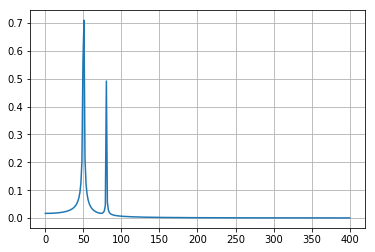

In [31]:
from scipy.fftpack import fft
# Number of sample points
N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
import matplotlib.pyplot as plt
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

The FFT input signal is inherently truncated. This truncation can be modelled as multiplication of an infinite signal with a rectangular window function. In the spectral domain this multiplication becomes convolution of the signal spectrum with the window function spectrum, being of form . This convolution is the cause of an effect called spectral leakage (see [WPW]). Windowing the signal with a dedicated window function helps mitigate spectral leakage. The example below uses a Blackman window from scipy.signal and shows the effect of windowing (the zero component of the FFT has been truncated for illustrative purposes).

/Users/Vishakh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  if sys.path[0] == '':


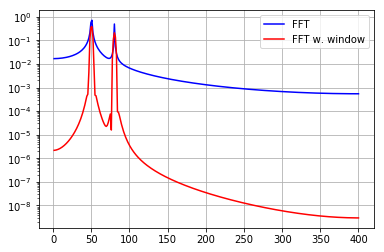

In [17]:
from scipy.fftpack import fft
# Number of sample points
N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = fft(y)
from scipy.signal import blackman
w = blackman(N)
ywf = fft(y*w)
xf = np.linspace(0.0, 1.0/(2.0*T), N/2)
import matplotlib.pyplot as plt
plt.semilogy(xf[1:N//2], 2.0/N * np.abs(yf[1:N//2]), '-b')
plt.semilogy(xf[1:N//2], 2.0/N * np.abs(ywf[1:N//2]), '-r')
plt.legend(['FFT', 'FFT w. window'])
plt.grid()
plt.show()

In case the sequence x is complex-valued, the spectrum is no longer symmetric. To simplify working wit the FFT functions, scipy provides the following two helper functions.

The function fftfreq returns the FFT sample frequency points.

In [19]:
from scipy.fftpack import fftfreq
freq = fftfreq(8, 0.125)
freq


array([ 0.,  1.,  2.,  3., -4., -3., -2., -1.])

In a similar spirit, the function fftshift allows swapping the lower and upper halves of a vector, so that it becomes suitable for display.



In [21]:
from scipy.fftpack import fftshift
x = np.arange(8)
fftshift(x)


array([4, 5, 6, 7, 0, 1, 2, 3])

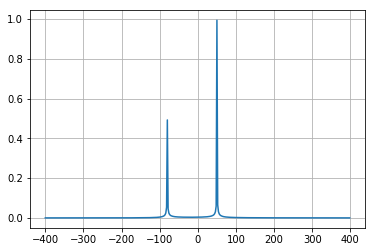

In [22]:
from scipy.fftpack import fft, fftfreq, fftshift
# number of signal points
N = 400
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N)
y = np.exp(50.0 * 1.j * 2.0*np.pi*x) + 0.5*np.exp(-80.0 * 1.j * 2.0*np.pi*x)
yf = fft(y)
xf = fftfreq(N, T)
xf = fftshift(xf)
yplot = fftshift(yf)
import matplotlib.pyplot as plt
plt.plot(xf, 1.0/N * np.abs(yplot))
plt.grid()
plt.show()

The function rfft calculates the FFT of a real sequence and outputs the FFT coefficients  with separate real and imaginary parts. In case of N being even: ; in case N being odd .

The corresponding function irfft calculates the IFFT of the FFT coefficients with this special ordering.

In [24]:
from scipy.fftpack import fft, rfft, irfft
x = np.array([1.0, 2.0, 1.0, -1.0, 1.5, 1.0])
print(fft(x))


yr = rfft(x)
print(yr)


irfft(yr)

x = np.array([1.0, 2.0, 1.0, -1.0, 1.5])
print(fft(x))



yr = rfft(x)
print(yr)


[ 5.5 +0.j          2.25-0.4330127j  -2.75-1.29903811j  1.5 +0.j
 -2.75+1.29903811j  2.25+0.4330127j ]
[ 5.5         2.25       -0.4330127  -2.75       -1.29903811  1.5       ]
[ 4.5       +0.j          2.08155948-1.65109876j -1.83155948+1.60822041j
 -1.83155948-1.60822041j  2.08155948+1.65109876j]
[ 4.5         2.08155948 -1.65109876 -1.83155948  1.60822041]


## Two and n-dimensional discrete Fourier 

The functions fft2 and ifft2 provide 2-dimensional FFT, and IFFT, respectively. Similar, fftn and ifftn provide n-dimensional FFT, and IFFT, respectively.

The example below demonstrates a 2-dimensional IFFT and plots the resulting (2-dimensional) time-domain signals.

/Users/Vishakh/anaconda3/lib/python3.6/site-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


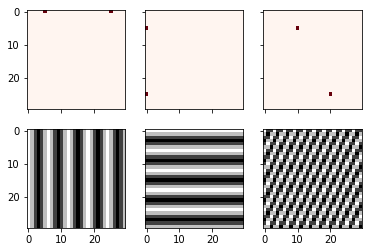

In [26]:
from scipy.fftpack import ifftn
import matplotlib.pyplot as plt
import matplotlib.cm as cm
N = 30
f, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, sharex='col', sharey='row')
xf = np.zeros((N,N))
xf[0, 5] = 1
xf[0, N-5] = 1
Z = ifftn(xf)
ax1.imshow(xf, cmap=cm.Reds)
ax4.imshow(np.real(Z), cmap=cm.gray)
xf = np.zeros((N, N))
xf[5, 0] = 1
xf[N-5, 0] = 1
Z = ifftn(xf)
ax2.imshow(xf, cmap=cm.Reds)
ax5.imshow(np.real(Z), cmap=cm.gray)
xf = np.zeros((N, N))
xf[5, 10] = 1
xf[N-5, N-10] = 1
Z = ifftn(xf)
ax3.imshow(xf, cmap=cm.Reds)
ax6.imshow(np.real(Z), cmap=cm.gray)
plt.show()

### Discrete Cosine Transforms
Scipy provides a DCT with the function dct and a corresponding IDCT with the function idct. There are 8 types of the DCT [WPC], [Mak]; however, only the first 3 types are implemented in scipy. “The” DCT generally refers to DCT type 2, and “the” Inverse DCT generally refers to DCT type 3. In addition, the DCT coefficients can be normalized differently (for most types, scipy provides None and ortho). Two parameters of the dct/idct function calls allow setting the DCT type and coefficient normalization.

For a single dimension array x, dct(x, norm=’ortho’) is equal to MATLAB dct(x).



The (unnormalized) DCT-III is the inverse of the (unnormalized) DCT-II, up to a factor 2N. The orthonormalized DCT-III is exactly the inverse of the orthonormalized DCT- II. The function idct performs the mappings between the DCT and IDCT types.

The example below shows the relation between DCT and IDCT for different types and normalizations.

### DCT and IDCT

In [28]:
from scipy.fftpack import dct, idct
x = np.array([1.0, 2.0, 1.0, -1.0, 1.5])
dct(dct(x, type=2, norm='ortho'), type=3, norm='ortho')

 # scaling factor 2*N = 10
idct(dct(x, type=2), type=2)

 # no scaling factor
idct(dct(x, type=2, norm='ortho'), type=2, norm='ortho')

 # scaling factor 2*N = 10
idct(dct(x, type=3), type=3)

 # no scaling factor
idct(dct(x, type=3, norm='ortho'), type=3, norm='ortho')

 # scaling factor 2*(N-1) = 8
idct(dct(x, type=1), type=1)

array([ 8., 16.,  8., -8., 12.])

## Discrete Sine Transforms

### DST and IDST

The example below shows the relation between DST and IDST for different types and normalizations.



In [36]:
from scipy.fftpack import dst, idst
x = np.array([1.0, 2.0, 1.0, -1.0, 1.5])
 # scaling factor 2*N = 10
idst(dst(x, type=2), type=2)

 # no scaling factor
idst(dst(x, type=2, norm='ortho'), type=2, norm='ortho')

 # scaling factor 2*N = 10
idst(dst(x, type=3), type=3)

 # no scaling factor
idst(dst(x, type=3, norm='ortho'), type=3, norm='ortho')

 # scaling factor 2*(N+1) = 8
idst(dst(x, type=1), type=1)


array([ 12.,  24.,  12., -12.,  18.])

# Filtering and convolution 
## Taken from https://docs.scipy.org/doc/scipy/reference/tutorial/signal.html

## Convolution/ Correlation

The code below shows a simple example for convolution of 2 sequences

In [41]:
x = np.array([1.0, 2.0, 3.0])
h = np.array([0.0, 1.0, 0.0, 0.0, 0.0])
signal.convolve(x, h)

signal.convolve(x, h, 'same')

/Users/Vishakh/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:491: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return x[reverse].conj()
/Users/Vishakh/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:251: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  in1zpadded[sc] = in1.copy()


array([2., 3., 0.])

This same function convolve can actually take  N-dimensional arrays as inputs and will return the  N-dimensional convolution of the two arrays as is shown in the code example below. The same input flags are available for that case as well.

In [42]:
x = np.array([[1., 1., 0., 0.], [1., 1., 0., 0.], [0., 0., 0., 0.], [0., 0., 0., 0.]])
h = np.array([[1., 0., 0., 0.], [0., 0., 0., 0.], [0., 0., 1., 0.], [0., 0., 0., 0.]])
signal.convolve(x, h)



/Users/Vishakh/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:491: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return x[reverse].conj()
/Users/Vishakh/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:251: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  in1zpadded[sc] = in1.copy()


array([[1., 1., 0., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 1., 0., 0., 0.],
       [0., 0., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.]])

### Correlate

In [44]:
import numpy as np
from scipy import signal, misc
import matplotlib.pyplot as plt

In [45]:
image = misc.face(gray=True)
w = np.zeros((50, 50))
w[0][0] = 1.0
w[49][25] = 1.0
image_new = signal.fftconvolve(image, w)

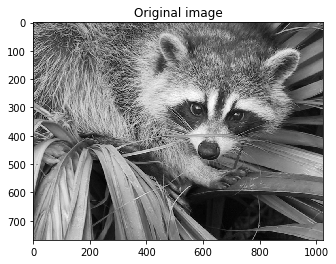

In [46]:
plt.figure()
plt.imshow(image)
plt.gray()
plt.title('Original image')
plt.show()

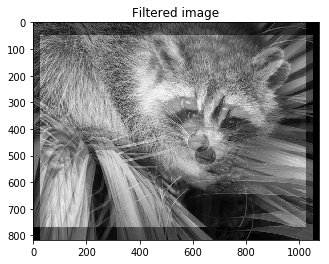

In [47]:
plt.figure()
plt.imshow(image_new)
plt.gray()
plt.title('Filtered image')
plt.show()

## Gaussian filter gaussian

In [49]:
import numpy as np
from scipy import signal, misc
import matplotlib.pyplot as plt

In [50]:
image = misc.ascent()
w = signal.gaussian(50, 10.0)
image_new = signal.sepfir2d(image, w, w)

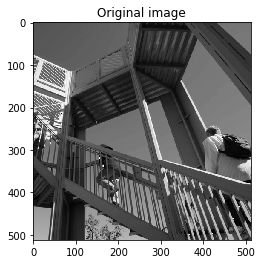

In [51]:
plt.figure()
plt.imshow(image)
plt.gray()
plt.title('Original image')
plt.show()

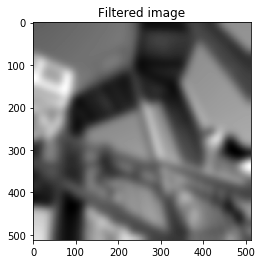

In [52]:
plt.figure()
plt.imshow(image_new)
plt.gray()
plt.title('Filtered image')
plt.show()

## Difference-equation filtering

In [54]:
x = np.array([1., 0., 0., 0.])
b = np.array([1.0/2, 1.0/4])
a = np.array([1.0, -1.0/3])
signal.lfilter(b, a, x)

zi = signal.lfiltic(b, a, y=[2.])
signal.lfilter(b, a, x, zi=zi)


(array([1.16666667, 0.63888889, 0.21296296, 0.07098765]), array([0.02366255]))

## Analysis of linear system

In [56]:
b = np.array([1.0/2, 1.0/4])
a = np.array([1.0, -1.0/3])
signal.tf2zpk(b, a)


(array([-0.5]), array([0.33333333]), 0.5)

## Filter design

In [59]:
b1 = signal.firwin(40, 0.5)
b2 = signal.firwin(41, [0.3, 0.8])
w1, h1 = signal.freqz(b1)
w2, h2 = signal.freqz(b2)

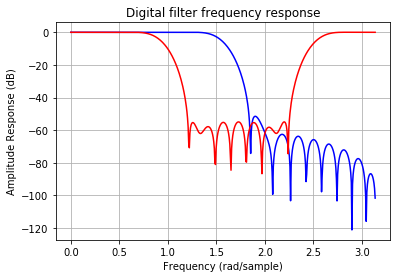

In [60]:
plt.title('Digital filter frequency response')
plt.plot(w1, 20*np.log10(np.abs(h1)), 'b')
plt.plot(w2, 20*np.log10(np.abs(h2)), 'r')
plt.ylabel('Amplitude Response (dB)')
plt.xlabel('Frequency (rad/sample)')
plt.grid()
plt.show()

The function firwin2 allows design of almost arbitrary frequency responses by specifying an array of corner frequencies and corresponding gains, respectively.

The example below designs a filter with such an arbitrary amplitude response.

In [61]:
b = signal.firwin2(150, [0.0, 0.3, 0.6, 1.0], [1.0, 2.0, 0.5, 0.0])
w, h = signal.freqz(b)

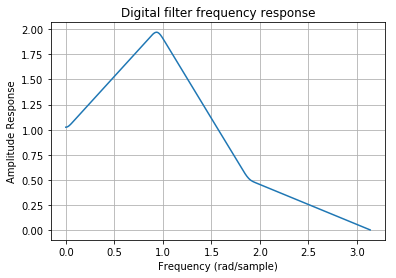

In [62]:
plt.title('Digital filter frequency response')
plt.plot(w, np.abs(h))
plt.title('Digital filter frequency response')
plt.ylabel('Amplitude Response')
plt.xlabel('Frequency (rad/sample)')
plt.grid()
plt.show()

### IIR Filter

In [64]:
b, a = signal.iirfilter(4, Wn=0.2, rp=5, rs=60, btype='lowpass', ftype='ellip')
w, h = signal.freqz(b, a)

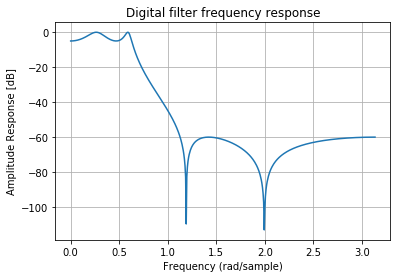

In [65]:
plt.title('Digital filter frequency response')
plt.plot(w, 20*np.log10(np.abs(h)))
plt.title('Digital filter frequency response')
plt.ylabel('Amplitude Response [dB]')
plt.xlabel('Frequency (rad/sample)')
plt.grid()
plt.show()

## Analog Filter Design

In [68]:
b, a = signal.iirdesign(wp=100, ws=200, gpass=2.0, gstop=40., analog=True)
w, h = signal.freqs(b, a)



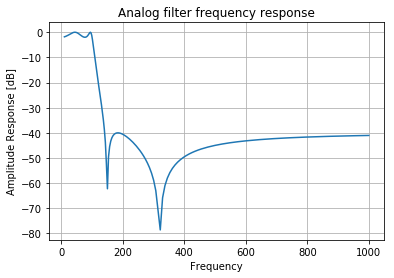

In [69]:
plt.title('Analog filter frequency response')
plt.plot(w, 20*np.log10(np.abs(h)))
plt.ylabel('Amplitude Response [dB]')
plt.xlabel('Frequency')
plt.grid()
plt.show()

In [70]:
z, p, k = signal.tf2zpk(b, a)

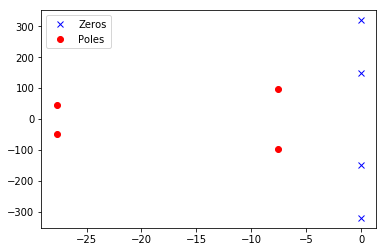

In [76]:
plt.plot(np.real(z), np.imag(z), 'xb')
plt.plot(np.real(p), np.imag(p), 'or')
plt.legend(['Zeros', 'Poles'], loc=2)


# File input and output 
# https://docs.scipy.org/doc/scipy/reference/tutorial/io.html

# Pandas 
# Lets try this live so we can see all the intermediate messing around and googling stuff

In [78]:
import pandas as pd
import sklearn 

# Get data from sklearn

# SKlearn

In [81]:
# Deep learning

# Pytorch
## Look at pytorch tutorial

# Keras

In [1]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

/Users/Vishakh/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using Theano backend.


# Example taken from https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py

In [2]:
'''Trains a simple convnet on the MNIST dataset.
Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).
16 seconds per epoch on a GRID K520 GPU.
'''

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 76s 7us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [ ]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Bonus 
## Deep generative models Or probablistic programming / modeling